Histogram is a method which you can use to represent your data visually, it can help you in some analysis and decisions.

So we will use it to calculate the histogram of the data inside each layer of an RGB image.
Any Image building unit is the pixel, and for each pixel, it has a value between 0 and 256.

what will happen is that we will calculate the histogram for each layer, so we will know for example how many pixels have values equal 1 or 2 ..... 256.

This method helps us to visualize the color distribution in the image.

# Code

In [6]:
#Import
import cv2
import matplotlib.pyplot as plt

In [8]:
#Read a new Image, by default it will be a RGB format image.
#Note: if you read an RGB Image and convert it to Gray Scale Image (1 Layer Image), 
#and saved it to your computer, it will be saved as 3 Layers RGB image
src = cv2.imread("./img/color-balls.jpg")

In [ ]:
#Split the RGB image to 3 separated layers.
b_plane, g_plane, r_plane =  cv2.split(src)
img = [b_plane, g_plane, r_plane]

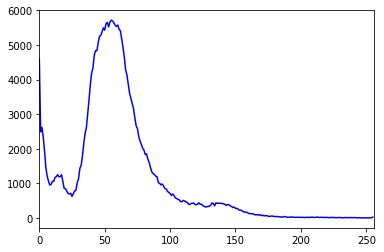

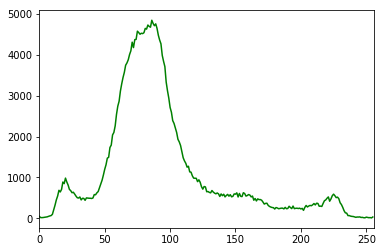

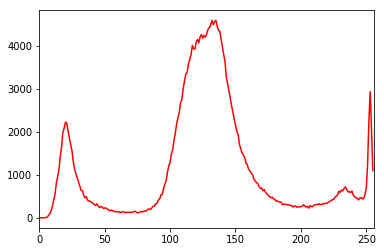

In [9]:
#Calculate the Histogram for each Layer and Plot it
histr = cv2.calcHist([src],[0],None,[256],[0,256]) 
plt.plot(histr,color = 'b')
plt.xlim([0,256])
plt.show()

histr = cv2.calcHist([src],[1],None,[256],[0,256]) 
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.show()

histr = cv2.calcHist([src],[2],None,[256],[0,256]) 
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.show()

> as you see above, you can see the color distribution in each layer

# C Language

this code will execute the same results. <br>
Thanks to Python.

In [ ]:
#include <opencv\cv.h>
#include <opencv\highgui.h>
#include <iostream>
#include <stdio.h>

double max(double x, double y){
 double maximum=0;
 if(x>y){
  maximum=x;
 }
 else if(y>x){
  maximum=y;
 }
return maximum;
}

int main(int argc, char *argv[]){

      cvNamedWindow("mainWin", CV_WINDOW_AUTOSIZE);
   cvMoveWindow("mainWin", 5, 5);
   cvNamedWindow("histogramWin", CV_WINDOW_AUTOSIZE);
   cvMoveWindow("histogramWin", 435, 5);
   int hist_size = 256;
   float range[] = {0,256};
   float *ranges[] = {range};

    IplImage *src_img=cvLoadImage("D:\\E-Library\\Programming\\Libraries\\OpenCV\\Images\\color-balls.jpg");
    IplImage *histogram = cvLoadImage( "D:\\E-Library\\Programming\\Libraries\\OpenCV\\Images\\histogram_scale.png" ); 
    IplImage *disp_img = cvCreateImage(cvSize((src_img->width)/1.6,(src_img->height)/1.6),IPL_DEPTH_8U,3);//

    IplImage *red_img = cvCreateImage( cvGetSize(src_img), IPL_DEPTH_8U, 1 ); 
    IplImage *green_img = cvCreateImage( cvGetSize(src_img), IPL_DEPTH_8U, 1 );
    IplImage *blue_img = cvCreateImage( cvGetSize(src_img), IPL_DEPTH_8U, 1 );

 IplImage *red_histogram = cvCreateImage( cvGetSize(histogram), IPL_DEPTH_8U, 3 );
 IplImage *green_histogram = cvCreateImage( cvGetSize(histogram), IPL_DEPTH_8U, 3 );
 IplImage *blue_histogram = cvCreateImage( cvGetSize(histogram), IPL_DEPTH_8U, 3 );

    CvHistogram* hist_red = cvCreateHist(1, &hist_size, CV_HIST_ARRAY, ranges, 1);
    CvHistogram* hist_blue = cvCreateHist(1, &hist_size, CV_HIST_ARRAY, ranges, 1);
    CvHistogram* hist_green = cvCreateHist(1, &hist_size, CV_HIST_ARRAY, ranges, 1);

    double max_value = 0;
    double max_value_red = 0;
    double max_value_green = 0;
    double max_value_blue = 0;
    double find_max = 0;
        max_value = 0; 
  max_value_red = 0; 
  max_value_green = 0; 
  max_value_blue = 0;

        cvResize(src_img,disp_img,CV_INTER_LINEAR);
        cvCvtPixToPlane( src_img, blue_img, green_img, red_img, 0 );
        cvCalcHist( &red_img, hist_red, 0, NULL );
        cvCalcHist( &blue_img, hist_blue, 0, NULL );
        cvCalcHist( &green_img, hist_green, 0, NULL );
  

        for( int i = 0; i < hist_size; i++ )
        {
            find_max = cvQueryHistValue_1D(hist_red,i);
            if (find_max > max_value_red)
            {
                max_value_red = find_max;
            }
        }
        for( int i = 0; i < hist_size; i++ )
        {
            find_max = cvQueryHistValue_1D(hist_green,i);
            if (find_max > max_value_green)
            {
                max_value_green = find_max;
            }
        }
        for( int i = 0; i < hist_size; i++ )
        {
            find_max = cvQueryHistValue_1D(hist_blue,i);
            if (find_max > max_value_blue)
            {
                max_value_blue = find_max;
            }
        }
  
  max_value = max(max(max_value_red,max_value_green),max_value_blue);
  cvScale( hist_green->bins, hist_green->bins, 438/max_value);
  cvScale( hist_red->bins, hist_red->bins, 438/max_value);
  cvScale( hist_blue->bins, hist_blue->bins, 438/max_value);

   for( int i= 0; i < hist_size; i++ )
            {
                cvRectangle( green_histogram, cvPoint(i*3+ 15, 448),cvPoint(i*3+16, 448 - cvRound(cvQueryHistValue_1D(hist_green,i))),cvScalar(0x00,0xff,0x00,0), -1);
            }
            
    
            for( int i= 0; i < hist_size; i++ )
            {
                cvRectangle( red_histogram, cvPoint(i*3+ 15, 448),cvPoint(i*3+16, 448 - cvRound(cvQueryHistValue_1D(hist_red,i))),cvScalar(0x00,0x00,0xff,0), -1);
            }
            
   
           for( int i= 0; i < hist_size; i++ )
            {
                cvRectangle( blue_histogram, cvPoint(i*3+ 15, 448),cvPoint(i*3+16, 448 - cvRound(cvQueryHistValue_1D(hist_blue,i))),cvScalar(0xff,0x00,0x00,0), -1);
            }


            cvAdd(histogram,green_histogram,histogram,0);
   cvAdd(histogram,red_histogram,histogram,0);
   cvAdd(histogram,blue_histogram,histogram,0);
        

        cvShowImage("mainWin", disp_img);
        cvShowImage("histogramWin", histogram);
        char d=cvWaitKey(15);
       
        cvWaitKey(0);     
        cvReleaseImage(&disp_img );
        cvReleaseImage(&red_img );
        cvReleaseImage(&green_img );
        cvReleaseImage(&blue_img );
        cvReleaseImage(&red_histogram );
        cvReleaseImage(&green_histogram );
        cvReleaseImage(&blue_histogram );
        cvReleaseImage(&histogram );
   
    return 0;
}
